# Case Study: How Can a Wellness Technology Company Play It Smart?
## Part of the Google Analytics Professional Certificate 
#### by Whoong Zi Wei

<br>

Bellabeat is a high-tech company founded by Urška Sršen and Sando Mur that manufactures health-focused smart products for women. In this case study, I am presented a scenario where I will be working for Urška Sršen and I have been asked to focus on one of Bellabeat's products and analyze smart device data to gain insight into **how consumers are using their smart devices**. 

In order to help guide Bellabeat in unlocking new growth opportunities, I am requested by Urška Sršen to analyze available consumer data, which for this scenario I am to use a dataset by [Fitbit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)). This dataset contains personal fitness tracker from thirty fitbit users. These thirty Fitbit users had consented to the submission of personal tracker data, which includes minute-level output for physical activity, heart rate, and sleep monitoring. It also includes information about daily activity, steps, and heart rate that can be used to explore users' habits. 

<br>

#### **Key Stakeholders**:

*     **Urska Srsen** - Bellabeat cofounder and CCO
*     **Sando Mur** - Bellabeat cofounder
*     **Bellabeat marketing analytics team**
    
#### **Bellabeat's Key Products**:

*     **Bellabeat app**: The Bellabeat app provides users with health data related to their activity. The Bellabeat app connects to their line of smart wellness products.
*     **Leaf**: Worn as either a bracelet, necklace, or clip; the Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
*     **Time**: A wellness watch that uses smart technology to track the user's activity, sleep, and stress.
*     **Spring**: A water bottle that tracks daily water intake. The bottle connects to the Bellabeat app to track the users hydration levels.
*     **Bellabeat membership**: A subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

<br>

## <ins>Business Objective</ins>
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


As this dataset has more than 10 csv files available, I am encouraged by Sršen to use as much as I can in order aid my research.

# Loading Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#just in case i need to visualize missing values
import missingno as msno
import seaborn as sns

# **Prepare Phase**

The datasets are gathered internally by FitBit, therefore the data can be safely assumed to be unbias and credible. I have also taken a look at the datasets in a spreadsheet software and there doesn't seem to be any problems other than the date formats are not properly converted. I will convert them to datetime formats when the need arises. 

#### There are a total of 18 datasets available. However, I will only need a few of them for this case study. I will also merge some datasets if neccesary as I progress through this case study. 

In [2]:
pd.options.display.width = None
pd.options.display.max_columns = None

dailyActivity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
dailyCalories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')

minuteSleep = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')
dailySteps = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
heartrateSeconds = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')
hourlyCalories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')

hourlyIntensities = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourlySteps = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
sleepDay = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
stepsDf = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
weightLog = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

In [3]:
hourlySteps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [4]:
hourlyIntensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [5]:
heartrateSeconds.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [6]:
dailySteps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [7]:
dailyCalories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [8]:
# sleepDay.shape (413, 5)
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [9]:
minuteSleep.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [10]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [11]:
stepsDf.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [12]:
hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [13]:
weightLog.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [14]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### After taking a look and understanding the datasets available, I've decided to use the above 11 datasets for my analysis. 

After having an understanding of these available datasets, I have prepared these questions in order to aid myself in the analysis phase. 

* How active are these users? 
* What factors contribute to the highest calorie burns? 
* Have these users been having a good night sleep? Is there a relationship between how active they are and their sleep schedule?
* How does the data vary from weekends and weekdays?

In [15]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# How active are these Users?

In [16]:
#convert to datetime
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'])

# add a new column that indicates the day's name
dailyActivity['day_name'] = dailyActivity['ActivityDate'].dt.day_name()

# add a new column that indicates weekday/weekend
dailyActivity['weekend_weekday'] = np.where(dailyActivity['ActivityDate'].dt.dayofweek > 4, 'Weekend', 'Weekday')


# Let's get a brief summary of their daily activities.

In [17]:
# steps taken summary
print("Total Steps Summary")
steps = dailyActivity['TotalSteps'].describe()
print(steps)
print('\n')

# byMinutes summary
minutes = dailyActivity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].describe()
print(minutes)
print('\n')

# Calories and total distance burned summary
calories = dailyActivity[['Calories', 'TotalDistance']].describe()
print(calories)
print('\n')

#Sleep Records, weight, and bmi
print(sleepDay[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].describe())
print('\n')
print(weightLog[['BMI', 'WeightKg']].describe())

Total Steps Summary
count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: TotalSteps, dtype: float64


       VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes  \
count         940.000000           940.000000            940.000000   
mean           21.164894            13.564894            192.812766   
std            32.844803            19.987404            109.174700   
min             0.000000             0.000000              0.000000   
25%             0.000000             0.000000            127.000000   
50%             4.000000             6.000000            199.000000   
75%            32.000000            19.000000            264.000000   
max           210.000000           143.000000            518.000000   

       SedentaryMinutes  
count        940.000000  
mean         991.210638  
std          301.267437  
min            0.000000  

### Insights from this summary: 
* Sedentary average around 991 minutes, or 16 hours. 
* The users on this dataset are mostly lightly active. 
* Users seem to be getting on average roughly 7 hours of sleep, and they mostly sleep one time per day on average. 
* On average, these users take 7637 steps per day, which is lower than what CDC recommends on one of their research. According to a [research](https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html) conducted by the CDC, an adult should ideally take at least 8000 steps per day as it is associated with a 51% lower risk for all-cause mortality.


I recommend Bellabeat to program their smart devices to inform users regarding the ideal total steps to be taken to their users. 

# Let's see if the day of the week, or weekends or weekdays, have any influence on how users are active. 

In [18]:
byMinute = dailyActivity.pivot_table(
    values = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'],
    index = 'day_name'
)

byMinute


,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,VeryActiveMinutes
day_name,,,,
Friday,12.111111,204.198413,1000.309524,20.055556
Monday,14.000000,192.058333,1027.941667,23.108333
Saturday,15.201613,207.145161,964.282258,21.919355
Sunday,14.528926,173.975207,990.256198,19.983471
Thursday,11.959184,185.421769,961.993197,19.408163
Tuesday,14.335526,197.342105,1007.361842,22.953947
Wednesday,13.100000,189.853333,989.480000,20.780000


In [19]:
byDistance = dailyActivity.pivot_table(
    values = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance'],
    index = 'day_name'
)

byDistance

,LightActiveDistance,ModeratelyActiveDistance,SedentaryActiveDistance,VeryActiveDistance
day_name,,,,
Friday,3.489127,0.483810,0.001825,1.312937
Monday,3.363083,0.585833,0.002583,1.537333
Saturday,3.617177,0.677339,0.001048,1.514597
Sunday,2.892314,0.618017,0.000661,1.488926
Thursday,3.283129,0.505170,0.002313,1.390476
Tuesday,3.471053,0.593026,0.001447,1.613289
Wednesday,3.256333,0.527067,0.001333,1.633467


<AxesSubplot:xlabel='day_name'>

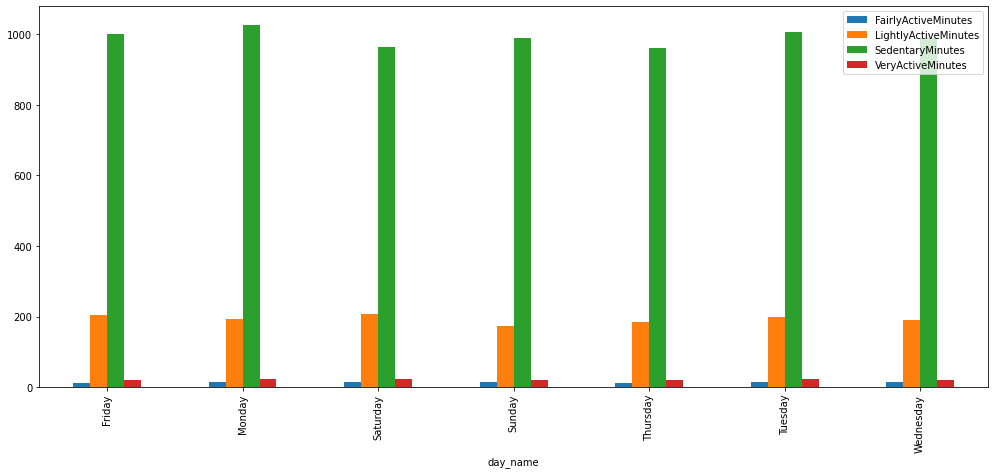

In [20]:
byMinute.plot(kind = 'bar', figsize = [17,7])

<AxesSubplot:xlabel='day_name'>

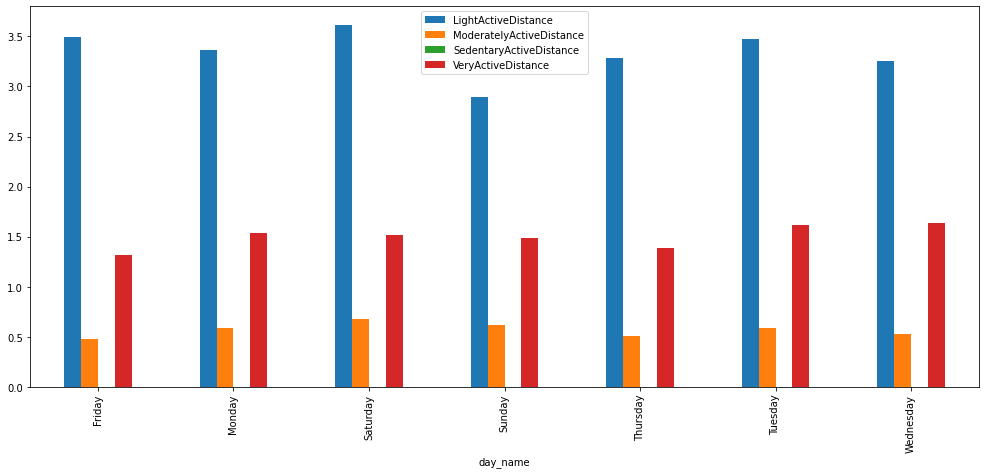

In [21]:
byDistance.plot(kind = 'bar', figsize = [17,7])

#### The most and least active based on the type of activity (Fairly, Lightly, etc)

In [22]:
print('The Most Active Based on the Type of Activity (Fairly, Lightly, etc)')
print(byMinute.idxmax())
print('\n')
print('The Least Active Based on the Type of Activity (Fairly, Lightly, etc)')
print(byMinute.idxmin())

The Most Active Based on the Type of Activity (Fairly, Lightly, etc)
FairlyActiveMinutes     Saturday
LightlyActiveMinutes    Saturday
SedentaryMinutes          Monday
VeryActiveMinutes         Monday
dtype: object


The Least Active Based on the Type of Activity (Fairly, Lightly, etc)
FairlyActiveMinutes     Thursday
LightlyActiveMinutes      Sunday
SedentaryMinutes        Thursday
VeryActiveMinutes       Thursday
dtype: object


#### The Most and Least Active Based On Distance

In [23]:
print('The Most Active Based On Distance')
print(byDistance.idxmax())
print('\n')
print('The Least Active Based On Distance')
print(byDistance.idxmin())

The Most Active Based On Distance
LightActiveDistance          Saturday
ModeratelyActiveDistance     Saturday
SedentaryActiveDistance        Monday
VeryActiveDistance          Wednesday
dtype: object


The Least Active Based On Distance
LightActiveDistance         Sunday
ModeratelyActiveDistance    Friday
SedentaryActiveDistance     Sunday
VeryActiveDistance          Friday
dtype: object


### If compared based on the days of the week, Monday seems to be the least active day on average based on the sedentary being the highest in both in terms of minutes and distance. Based on the data, Saturday seems be the day that users did the most exercise lightly or moderately (accounting both the distance and minute on average)

## **However, based on the above visualizations and summary data, I can't really draw a solid conclusion. For now, I hyphothesize that users are probably most active on Saturdays.** 

# **What factors contribute to the highest calorie burns?**

In [24]:
caloriesGrouped = dailyActivity.pivot_table(
    values = 'Calories',
    index = 'day_name'
)

caloriesGrouped

,Calories
day_name,
Friday,2331.785714
Monday,2324.208333
Saturday,2354.967742
Sunday,2263.000000
Thursday,2199.571429
Tuesday,2356.013158
Wednesday,2302.620000


### Based on the summary data, it would seem that people burn the least calorie on Thursdays on average, whereas Tuesday is has the most calories burned on average.

# Let's analyze steps taken vs calories burned

Text(0.5, 1.0, 'Relationship Between Total Steps Taken and Calories Burned')

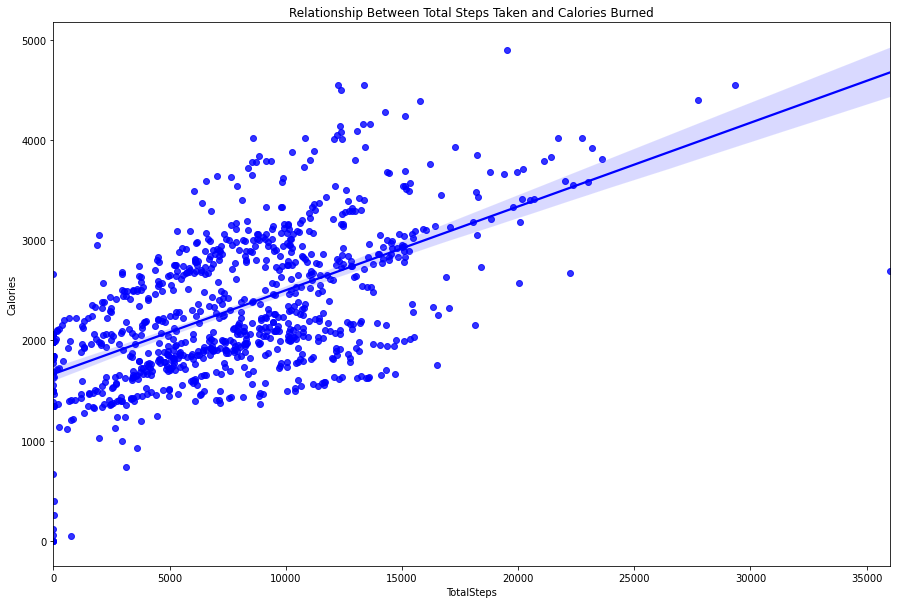

In [25]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_style("darkgrid")
reg = sns.regplot(
    data = dailyActivity,
    x = 'TotalSteps',
    y = 'Calories',
    ax = ax,
    color = 'blue'
)

reg.set_title('Relationship Between Total Steps Taken and Calories Burned')


### Based on this visualization, I can clearly see that there's a positive relationship between these total steps taken and calories burned. The more steps that were taken on a particular day, the more calories were burned. I guess this was probably very obvious as the more we move our bodies, we tend to burn more calories. 

# **How does the data vary from weekends and weekdays?**

### How much calories do they burn between weekdays and weekends? How about the quality of their sleep?

# I will now inner join between the sleepDay and dailyActivity dataset in order to analyze the users' sleeping behaviours. 

In [26]:
# Ensuring proper formatting and creating a new column in order to assist in the joining process
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])
sleepDay['date'] = pd.to_datetime(sleepDay['SleepDay'])
dailyActivity['date'] = pd.to_datetime(dailyActivity['ActivityDate'])

# sleepDay[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']]

#join sleep data with daily activity
joinedDf = dailyActivity.merge(sleepDay, on = ['Id', 'date'])

In [27]:
joinedDf.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_name,weekend_weekday,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,Weekday,2016-04-12,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,Weekday,2016-04-13,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,Weekday,2016-04-15,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,Weekend,2016-04-16,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday,Weekend,2016-04-17,2016-04-17,1,700,712


# Calories burned between weekdays and weekends

In [28]:
dailyActivity.groupby('weekend_weekday')['Calories'].describe()

,count,mean,std,min,25%,50%,75%,max
weekend_weekday,,,,,,,,
Weekday,695.0,2301.516547,704.675507,0.0,1841.0,2159.0,2799.5,4900.0
Weekend,245.0,2309.546939,756.589860,0.0,1792.0,2096.0,2739.0,4552.0


# Sleep quality between weekdays and weekends

In [29]:
joinedDf.groupby('weekend_weekday')[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].describe()

TotalSleepRecords                                          \
                            count      mean       std  min  25%  50%  75%   
weekend_weekday                                                             
Weekday                     300.0  1.093333  0.313501  1.0  1.0  1.0  1.0   
Weekend                     113.0  1.185841  0.412931  1.0  1.0  1.0  1.0   

                     TotalMinutesAsleep                                       \
                 max              count        mean         std   min    25%   
weekend_weekday                                                                
Weekday          3.0              300.0  413.106667  103.459145  59.0  362.5   
Weekend          3.0              113.0  436.353982  150.162288  58.0  361.0   

                                     TotalTimeInBed                          \
                   50%    75%    max          count        mean         std   
weekend_weekday                                                               
Weekday          426.0  472.5  796.0          300.0  449.903333  108.342949   
Weekend          465.0  530.0  775.0          113.0  481.831858  165.356428   

                                                   
                  min    25%    50%    75%    max  
weekend_weekday                                    
Weekday          65.0  406.0  458.0  506.0  961.0  
Weekend          61.0  402.0  501.0  575.0  961.0

### Based on this data, it seems that the users have a much better sleep quality on average on the weekends. Also, it seems that they burned more calories on the weekends as well, which further confirms my earlier hypothesis that saturdays are the most popular day for users to engage in physical exercises. 

# Let's see the relationship between total sleep minutes and total time in bed subgrouped by the type of week

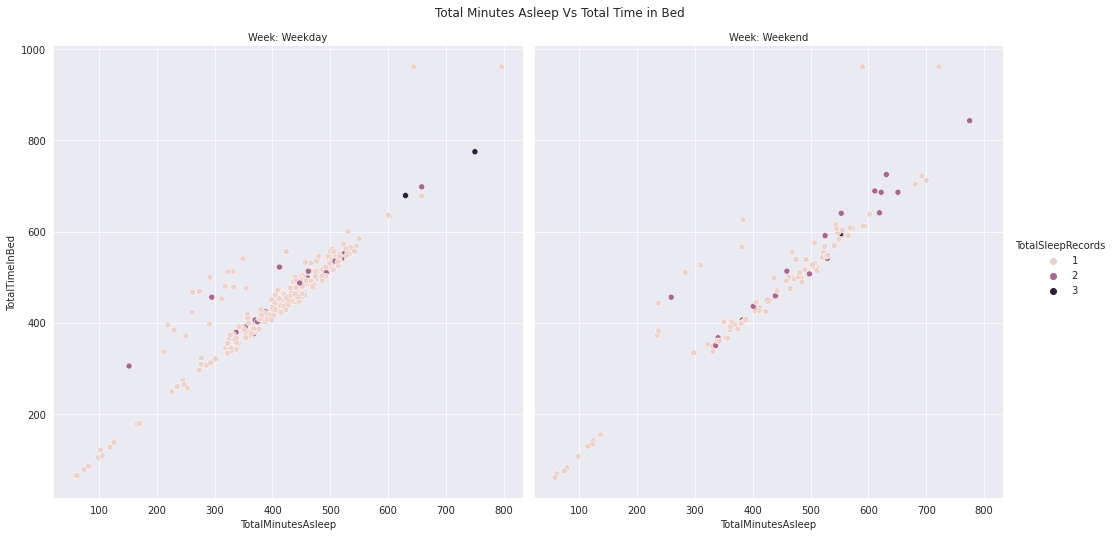

In [30]:
sleep = sns.relplot(
    data = joinedDf, 
    x = 'TotalMinutesAsleep',
    y = 'TotalTimeInBed',
    col = 'weekend_weekday',
    hue = 'TotalSleepRecords',
    height = 7
)

sleep.fig.suptitle('Total Minutes Asleep Vs Total Time in Bed',  y = 1.03)
sleep.set_titles("Week: {col_name}")
plt.show()

### Both display a positive relationship. I guess it's common sense that the longer you stay in bed, the more likely you will fall into sleep. Let's analyze this in another way.

### Based on a study [here](https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need), healthy adults are suggested to sleep between 7-9 hours. Therefore, I will categorized those who slept below 7 as Bad Sleepers, those who slept beyond 9 hours Oversleepers, and those between 7 and 9 hours as normal. 

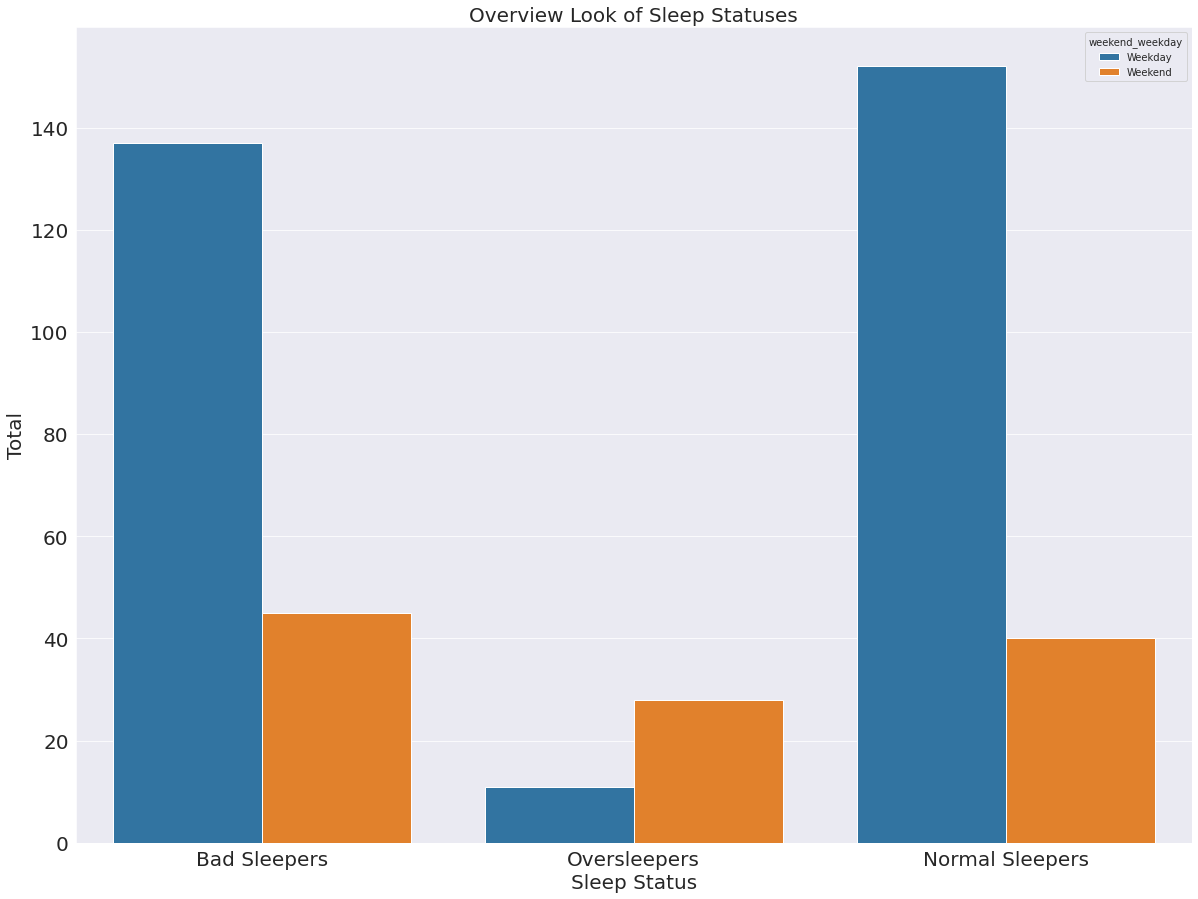

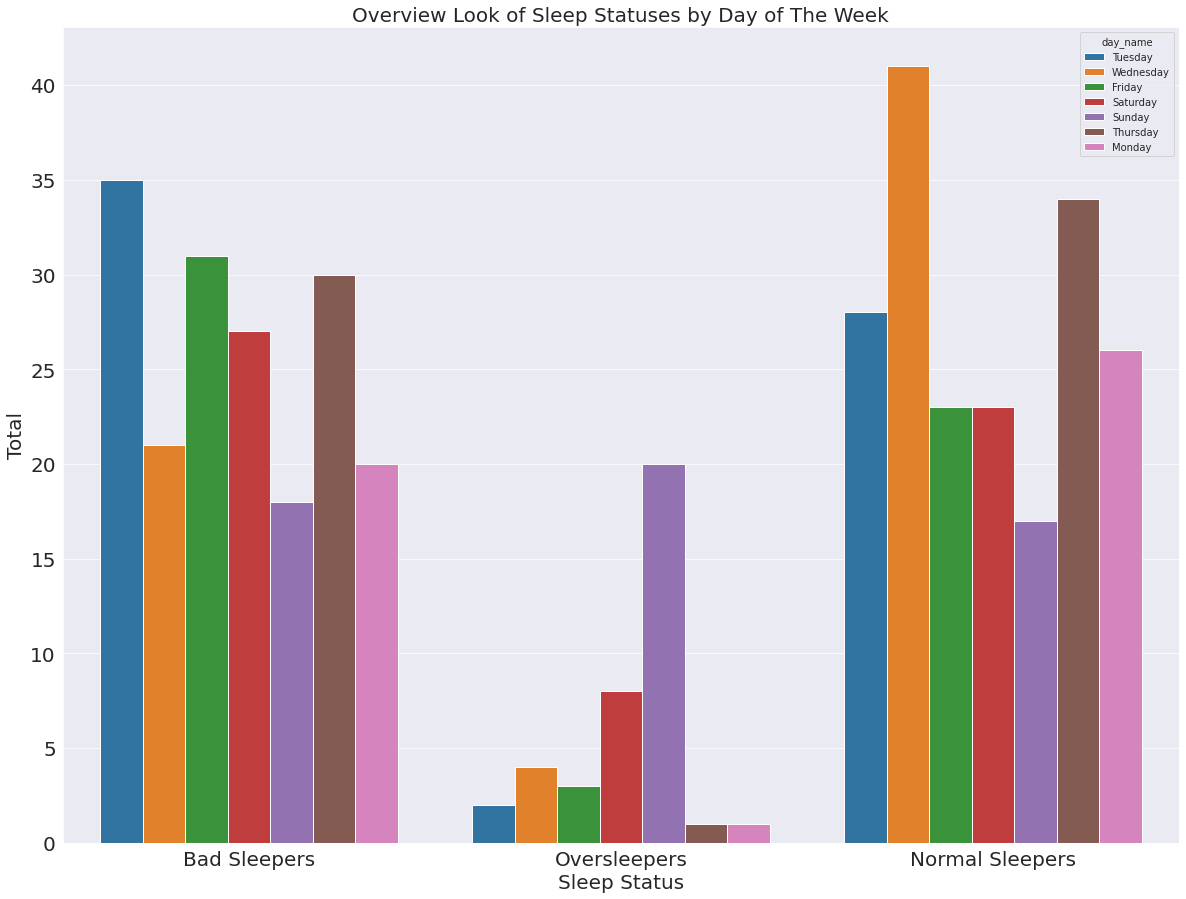

In [31]:
# convert to proper minutes
sleepDay['TotalMinutesAsleep'] = pd.to_timedelta(sleepDay['TotalMinutesAsleep'], unit = 'm')
sleepDay['TotalMinutesAsleep'] = sleepDay['TotalMinutesAsleep'].astype('timedelta64[m]')

#convert to hours
sleepDay['TotalHoursAsleep'] = sleepDay['TotalMinutesAsleep'] / 60

# round to nearest hundreths 
sleepDay['TotalHoursAsleep'] = sleepDay['TotalHoursAsleep'].round(2)

#add sleep status
sleepDay['SleepStatus'] = np.where(sleepDay['TotalHoursAsleep'] < 7, 'Bad Sleepers', 
         (np.where( sleepDay['TotalHoursAsleep'] > 9, 'Oversleepers', 'Normal Sleepers'))
        ) 
#used ternary operator. link for future me's reference: https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions
#np.select article by dataquest: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

sleepDay['day_name'] = sleepDay['SleepDay'].dt.day_name()
sleepDay['weekend_weekday'] = np.where(sleepDay['SleepDay'].dt.dayofweek > 4, 'Weekend', 'Weekday')

sleepDay.head()

#Overview
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)
overview = sns.countplot(
    data = sleepDay,
    x = sleepDay['SleepStatus'],
    hue = 'weekend_weekday',
    ax = ax
)
overview.set_title('Overview Look of Sleep Statuses', fontsize = 20)
overview.set_xlabel('Sleep Status', fontsize = 20)
overview.set_ylabel('Total', fontsize = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.show()

#by Day of the week
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)
overview2 = sns.countplot(
    data = sleepDay,
    x = sleepDay['SleepStatus'],
    hue = 'day_name',
    ax = ax
)
overview2.set_title('Overview Look of Sleep Statuses by Day of The Week', fontsize = 20)
overview2.set_xlabel('Sleep Status', fontsize = 20)
overview2.set_ylabel('Total', fontsize = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.show()

### Overall it seems that people tend to oversleep the most on a Sunday, and they often sleep below 7 hours the most on a Tuesday. It makes sense for many people to oversleep on a Sunday as most people won't need to work. However, as I've categorized those sleeping over 9 hours as Bad Sleepers, Bellabeat should make an effort to advice its users to avoid sleeping in on Sundays in order to not damage their health. 

### Also it seems that the users underslept the most on Tuesdays. Not sure why this is the case, I should try to investigate this. 




# Let's look back at my summary data based on the users' active status.

In [32]:
byMinute

,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,VeryActiveMinutes
day_name,,,,
Friday,12.111111,204.198413,1000.309524,20.055556
Monday,14.000000,192.058333,1027.941667,23.108333
Saturday,15.201613,207.145161,964.282258,21.919355
Sunday,14.528926,173.975207,990.256198,19.983471
Thursday,11.959184,185.421769,961.993197,19.408163
Tuesday,14.335526,197.342105,1007.361842,22.953947
Wednesday,13.100000,189.853333,989.480000,20.780000


### A quick glimpse back, the users are the most idle on Mondays, and other than their Very Active Minutes, the average for the rest seemed to have increased on Tuesday. However, there isn't much I could tell just based on these information as there's not much signicant difference. Maybe the heartrate dataset can help me?

# Let's analyze the heartrate dataset

In [33]:
# There's 2,483,658 rows!
heartrateSeconds.shape
print(heartrateSeconds.head())
summary = round(heartrateSeconds['Value'].describe())
print('\n')
print(summary)
unique = heartrateSeconds['Id'].nunique() #there's only 14 unique uses
print('\nNumber of Users in This Dataset: ' + str(unique))

           Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101


count    2483658.0
mean          77.0
std           19.0
min           36.0
25%           63.0
50%           73.0
75%           88.0
max          203.0
Name: Value, dtype: float64

Number of Users in This Dataset: 14


### Since FitBit collects heart-rates in BPM, or Beats Per Minute, the Value column is therefore the BPM collected. According to FitBit's [website](https://healthsolutions.fitbit.com/blog/how-do-fitbit-trackers-monitor-heart-rate/), a typical resting heart-rate range is 60 to 100 beats per minute for adults. It also mentions that active people often have a lower resting heart rate, therefore drastic changes to this number can signify health issues and should be discussed with a doctor.

### Moving on to the summary:
1. The average heart rate is 77, which is inside the range of a typical resting heart-rate range. 
2. Seems like there's someone that had a maximun BPM of 203. That is quite worrisome. Bellabeat should consider implementing a system that allows their users to be notified if their BPM is outside the range of 60 to 100 and be checked out by a doctor. 

## Alright let's start with analyzing whether the heart-rate has anything to do with people undersleeping.

In [34]:
#Ensure proper time formatting
heartrateSeconds['Time'] = pd.to_datetime(heartrateSeconds['Time'], format = '%m/%d/%Y %I:%M:%S %p')

mean = heartrateSeconds.groupby(heartrateSeconds['Time'].dt.day_name())['Value'].mean()
mean


Time
Friday       77.520836
Monday       77.454335
Saturday     79.973815
Sunday       75.925004
Thursday     77.035902
Tuesday      77.013723
Wednesday    76.451580
Name: Value, dtype: float64

### Sadly, it doesn't seem like information on the heart-rate seem to be of help here. But the average seems to be highest on Saturdays, which I'd assume it's due to the fact that the users exercise the most on Saturdays. It doesn't seem I would be able to determine why some people undersleep with the information I currently have right now. 

### Let's look at the average heart-rate per minute for each hour of the day

Text(0.5, 1.0, 'Average Heart-Rate Per Minute Based on Time (Hour)')

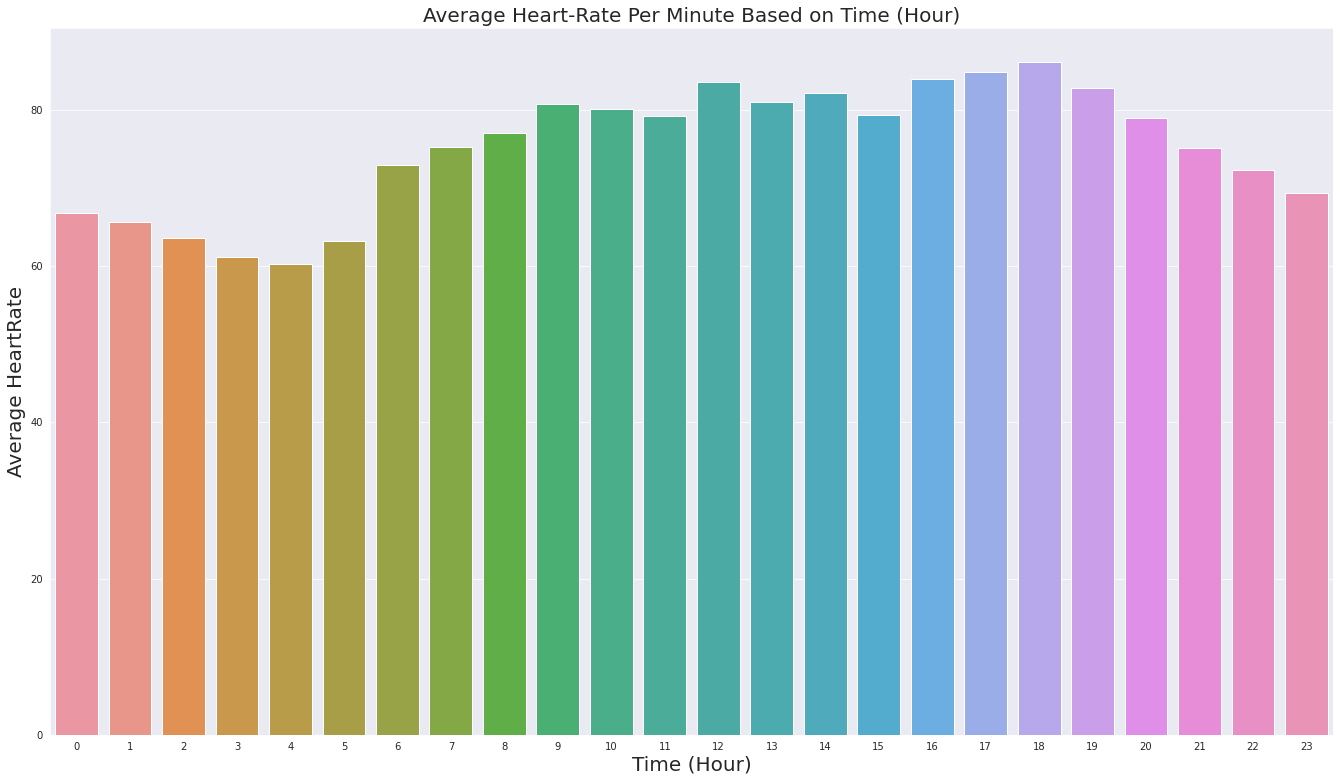

In [35]:
mean = heartrateSeconds.groupby(heartrateSeconds['Time'].dt.hour)['Value'].mean()
fig_dims = (23, 13)
fig, ax = plt.subplots(figsize=fig_dims)

# create temporary dataframe
tempDf = pd.DataFrame(mean)

tempDf

t = sns.barplot(
    data = tempDf, 
    x = tempDf.index,
    y = 'Value'
)

t.set_xlabel('Time (Hour)', fontsize = 20)
t.set_ylabel('Average HeartRate', fontsize = 20)
t.set_title('Average Heart-Rate Per Minute Based on Time (Hour)', fontsize = 20)

### Average Heart-rate per minute is generally slower during the night, which is understandable since most people will be resting during the night. Heart-rate is high between 9am to 6pm, and starts to drop after 6pm. Heart rate also seems to be at its highest at 12pm and 6pm. Seems like users are somewhat tensed during these two distinct hours. 

# Let's try analyzing daily steps

In [36]:
#rejoining a new df as sleepDay was altered
rejoined = dailyActivity.merge(sleepDay, on = ['Id', 'date'])
rejoined.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_name_x,weekend_weekday_x,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,SleepStatus,day_name_y,weekend_weekday_y
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,Weekday,2016-04-12,2016-04-12,1,327.0,346,5.45,Bad Sleepers,Tuesday,Weekday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,Weekday,2016-04-13,2016-04-13,2,384.0,407,6.40,Bad Sleepers,Wednesday,Weekday
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,Weekday,2016-04-15,2016-04-15,1,412.0,442,6.87,Bad Sleepers,Friday,Weekday
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,Weekend,2016-04-16,2016-04-16,2,340.0,367,5.67,Bad Sleepers,Saturday,Weekend
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday,Weekend,2016-04-17,2016-04-17,1,700.0,712,11.67,Oversleepers,Sunday,Weekend


    day_name   TotalSteps
1     Monday  7780.866667
5    Tuesday  8125.006579
6  Wednesday  7559.373333
4   Thursday  7405.836735
0     Friday  7448.230159
2   Saturday  8152.975806
3     Sunday  6933.231405


Text(0.5, 1.0, 'Average Total Steps Taken by the Day of the Week')

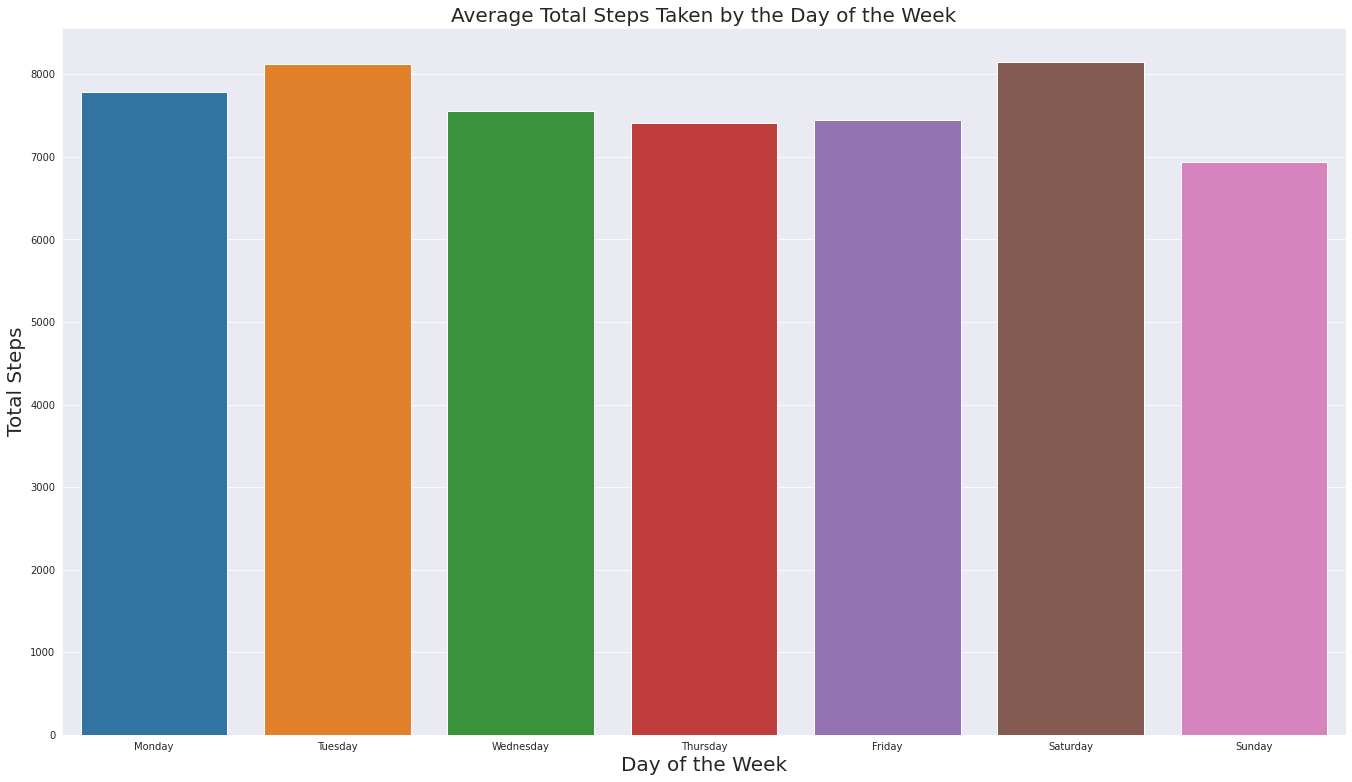

In [37]:
# Before I analyze with sleep status, let's examine just the total steps taken by weekdays

meanSteps = dailyActivity.groupby('day_name')['TotalSteps'].mean()

fig_dims = (23, 13)
fig, ax = plt.subplots(figsize=fig_dims)

# create temporary dataframe
tempDf = pd.DataFrame(meanSteps)
tempDf = tempDf.reset_index()

#sort by day
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tempDf['day_name'] = pd.Categorical(tempDf['day_name'], categories = cats)
tempDf = tempDf.sort_values('day_name')

print(tempDf)

t = sns.barplot(
    data = tempDf, 
    x = 'day_name',
    y = 'TotalSteps'
)

t.set_xlabel('Day of the Week', fontsize = 20)
t.set_ylabel('Total Steps', fontsize = 20)
t.set_title('Average Total Steps Taken by the Day of the Week', fontsize = 20)

### On weekdays, Tuesday has the most steps taken, whereas on weekends it has the most steps taken on Saturdays. I hyphothesize that since Tuesday seems to be the most busiest day among the users, this may be the very reason why users are mostly undersleeping on Tuesdays.

# Is there a relationship between how active they are and their sleep schedule?

### Since most of these users are lightly active, let's see if there's any relationship between light active users and their sleeping behaviours. 

In [38]:
lightlyActive = joinedDf[['LightlyActiveMinutes', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']]

lightlyActive.head()

,LightlyActiveMinutes,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,328,1,327,346
1,217,2,384,407
2,209,1,412,442
3,221,2,340,367
4,164,1,700,712


Text(0.5, 1.0, 'Relationship between Total Minutes of Sleep and Users Who are Light Active')

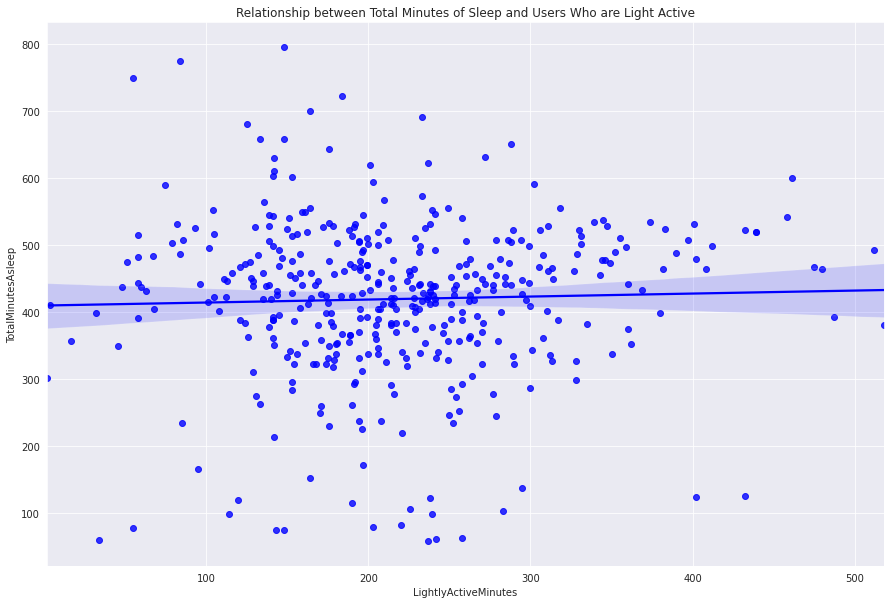

In [39]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_style("darkgrid")
reg = sns.regplot(
    data = lightlyActive,
    x = 'LightlyActiveMinutes',
    y = 'TotalMinutesAsleep',
    ax = ax,
    color = 'blue'
)

reg.set_title('Relationship between Total Minutes of Sleep and Users Who are Light Active')

### Looks like there's no correlation between those who lightly active and the amount of sleep they have. 

# What about those who are mostly sedentary?

In [40]:
sedentary = joinedDf[['SedentaryMinutes', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']]

sedentary.head()

,SedentaryMinutes,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,728,1,327,346
1,776,2,384,407
2,726,1,412,442
3,773,2,340,367
4,539,1,700,712


Text(0.5, 1.0, 'Relationship between Total Minutes of Sleep and Users Who are Sedentary')

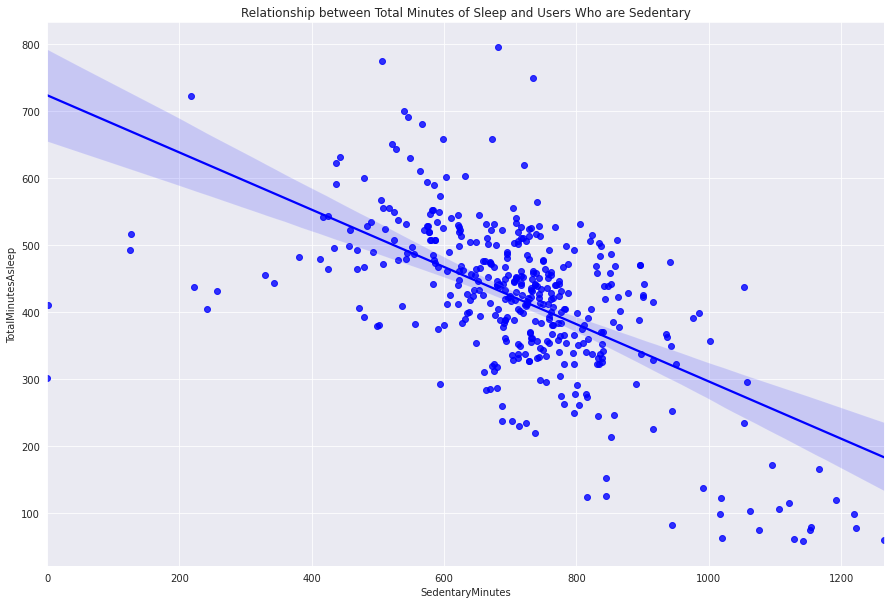

In [41]:
sns.set_style("darkgrid")
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)

s = sns.regplot(
    data = sedentary,
    x = 'SedentaryMinutes',
    y = 'TotalMinutesAsleep',
    ax = ax,
    color = 'blue'
)

s.set_title('Relationship between Total Minutes of Sleep and Users Who are Sedentary')

### There's a negative correlation! The more idle the person is during the day, it seems that they would also be getting fewer sleep than those who are more active! 

### I recommend bellabeat to take note of this insight and maybe consider sending notifications to users who might have been idle throughout the day to get some light exercises so as to allow them to have a better sleep later in the day. 

# What About those who are fairly active and very active?

In [42]:
joinedDf.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_name,weekend_weekday,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,Weekday,2016-04-12,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,Weekday,2016-04-13,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,Weekday,2016-04-15,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,Weekend,2016-04-16,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday,Weekend,2016-04-17,2016-04-17,1,700,712


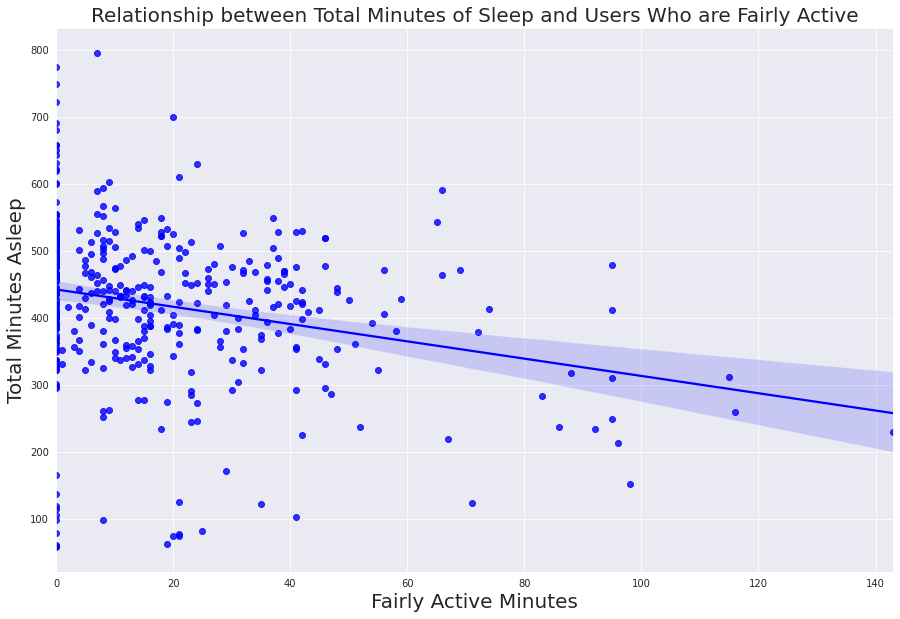

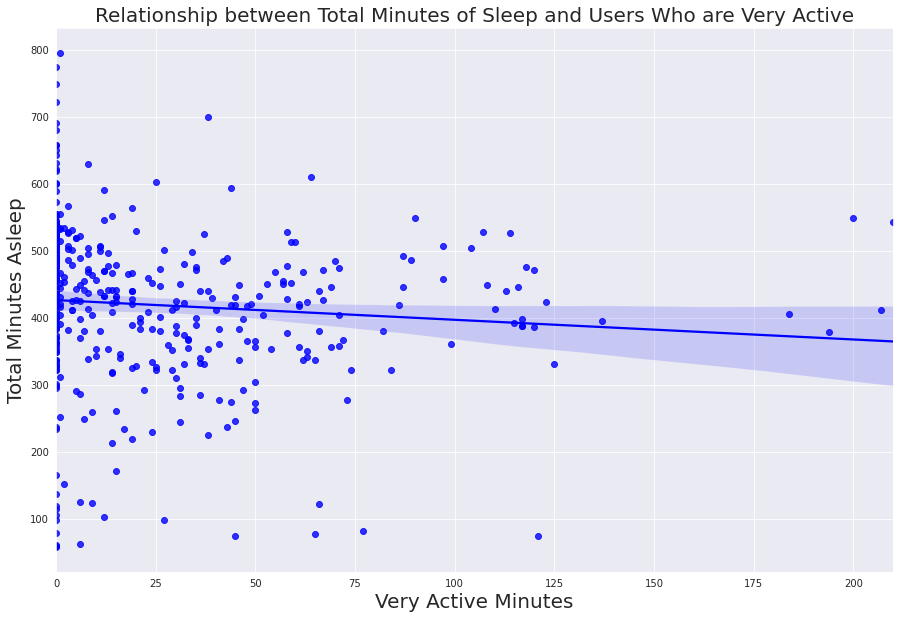

In [43]:
sns.set_style("darkgrid")
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)

s = sns.regplot(
    data = joinedDf,
    x = 'FairlyActiveMinutes',
    y = 'TotalMinutesAsleep',
    ax = ax,
    color = 'blue'
)

s.set_title('Relationship between Total Minutes of Sleep and Users Who are Fairly Active', fontsize = 20)
s.set_xlabel('Fairly Active Minutes', fontsize = 20)
s.set_ylabel('Total Minutes Asleep', fontsize = 20)
plt.show()

# Very Active 
sns.set_style("darkgrid")
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)

s = sns.regplot(
    data = joinedDf,
    x = 'VeryActiveMinutes',
    y = 'TotalMinutesAsleep',
    ax = ax,
    color = 'blue'
)

s.set_title('Relationship between Total Minutes of Sleep and Users Who are Very Active', fontsize = 20)
s.set_xlabel('Very Active Minutes', fontsize = 20)
s.set_ylabel('Total Minutes Asleep', fontsize = 20)
plt.show()

### Although there's a slight negative trend for Fairly active users, it doesn't seem to be a very strong correlation but still worth mentioning. Also, those who are very active don't seem to have a correlation as well. 

# On what hour do users are the most active during the day?

In [44]:
#Ensuring proper formatting
hourlyIntensities['ActivityHour'] = pd.to_datetime(hourlyIntensities['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')

Text(0.5, 1.0, 'Average Total Intensity Per Hour')

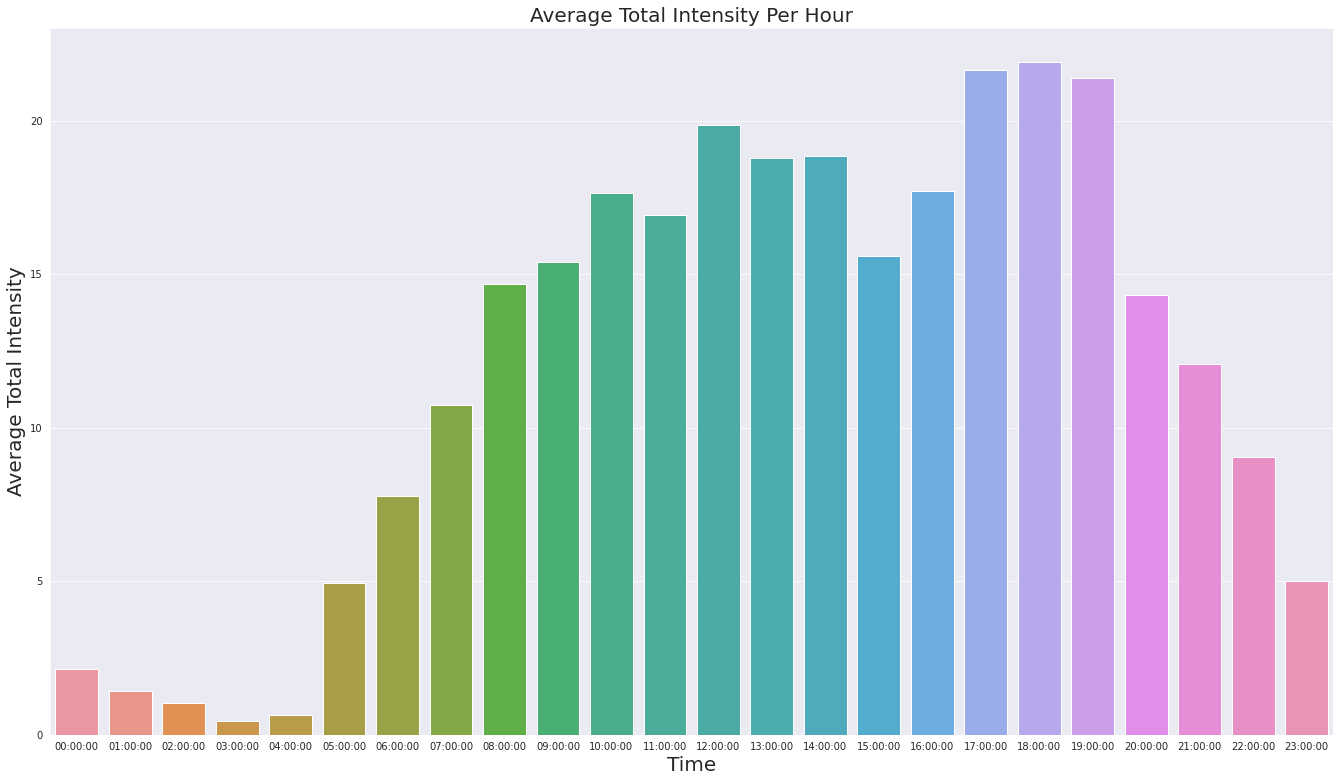

In [45]:
#Group by the hours and find the average total intensity, which should therefore give only 24 rows in the end
mean = hourlyIntensities.groupby(hourlyIntensities['ActivityHour'].dt.time)['TotalIntensity'].mean()

sns.set_style("darkgrid")
fig_dims = (23, 13)
fig, ax = plt.subplots(figsize=fig_dims)

#create temporary dataframe
tempDf = pd.DataFrame(mean)

t = sns.barplot(
    data = tempDf, 
    x = tempDf.index,
    y = 'TotalIntensity'
)

t.set_xlabel('Time', fontsize = 20)
t.set_ylabel('Average Total Intensity', fontsize = 20)
t.set_title('Average Total Intensity Per Hour', fontsize = 20)

## With this visualization I can see that:
* Users are most active between 5pm to 7pm. I speculate that this is because users tend to finish work around these hours, and right after they start engaging in physical activities such as going to the gym or a jog. **Therefore, I recommend Bellabeat to notify users to do some exercises around this time frame.**
* Users start to get active starting from 5am and rest on 9pm. 

# On what day of the week are users the most active during the day?

Text(0.5, 1.0, 'Average Total Intensity Vs Day')

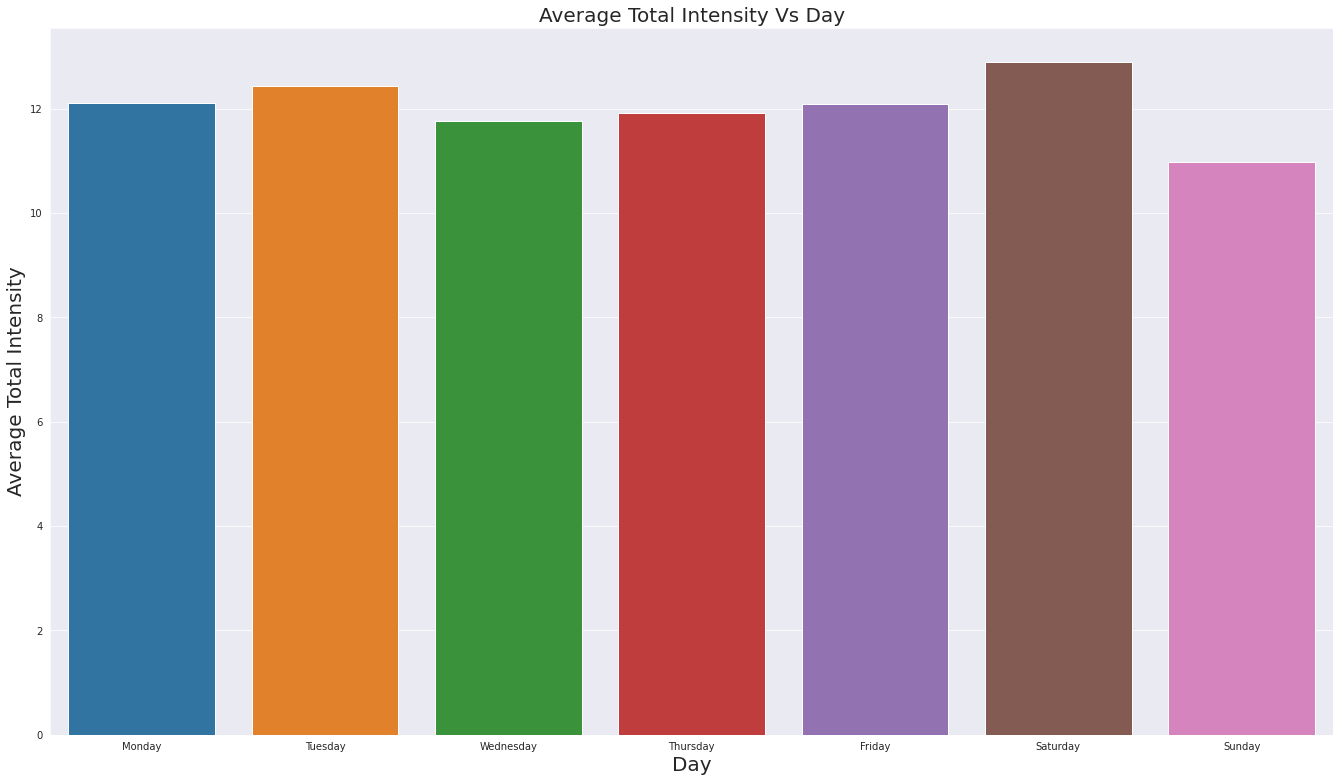

In [46]:
meanDays = hourlyIntensities.groupby(hourlyIntensities['ActivityHour'].dt.day_name())['TotalIntensity'].mean()

fig_dims = (23, 13)
fig, ax = plt.subplots(figsize=fig_dims)

# create temporary dataframe
tempDf = pd.DataFrame(meanDays)
tempDf = tempDf.reset_index()

tempDf.rename(columns = {"ActivityHour": "Day"}, inplace = True)

#sort by day
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tempDf['Day'] = pd.Categorical(tempDf['Day'], categories = cats)
tempDf = tempDf.sort_values('Day')

t= sns.barplot(
    x = 'Day',
    y = 'TotalIntensity',
    data = tempDf
)

t.set_xlabel('Day', fontsize = 20)
t.set_ylabel('Average Total Intensity', fontsize = 20)
t.set_title('Average Total Intensity Vs Day', fontsize = 20)

### With the above visualization, I can see that Sunday is the least intense among the users and that Saturday is the most intense. Also, on weekdays Tuesdays seem to be the most busiest in terms of both average total intensity and total steps taken. With this much evidence, I can safely conclude that Saturdays are the most active day on weekends and Tuesdays the most busiest on weekdays. 

# Summary of my findings:
After analyzing the data, I have found some insightful information that may be of interest for Bellabeat. As a reminder, Bellabeat is a high-tech company that manufactures health-focused smart products for women. Here are some business marketing recommendations that I can give to Bellabeat:
1. I suggest Bellabeat to give notifications to their users who had been idle during the day to consider doing some light exercises. And with my previous finding that shows that being sedentary is associating to lack of sleep, it shows that the more idle you are, the lesser the quality of one's sleep may be. Therefore, this reason may serve as a good incentive to encourage users to be more active as this may allow them to sleep better when it's time for bed. 

2. I recommend Bellabeat to notify/remind users to do some exercises between 5pm and 7pm as this is when most users finish work and start exercising based on the data. This is also a great opportunity to encourage those who might have a goal to lose weight to start exercising on this time frame. 

3. Bellabeat should consider notifying users the importance of at least getting more than 8000 steps per day as this will benefit the users in the long run. This is based on a [research](https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html) by CDC that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Therefore, it is highly recommended for Bellabeat to consider this advice into consideration for their next marketing strategy. 

4. As users tend exercise more on Saturdays, Bellabeat can use this information to remind users to do some exercise on Saturdays as they are more likely to be more motivated. Also, there seems to be a noticable drop in activity when it is Sunday. Therefore, I recommend Bellabeat to encourage users to be more proactive during the Sundays as, based on the data, users tend to be a bit more laidback on Sundays. Users also seem to oversleep the most on Sunday, therefore Bellabeat should consider advising their users to be mindful of this as oversleeping is associated with risk of diabetes, heart disease, stroke, and death ([source](https://amerisleep.com/blog/oversleeping-the-health-effects/))

6. Bellabeat should notify users when their heart-rate detected to be outside the range of 60-100 BPM as this may signify a potential underlying health condition that the user may not be aware of.

7. By combining the fact that Tuesday has the most steps taken and that average total intensity is the highest, this might be the very reason why the users on this dataset are undersleeping the most on Tuesday. Bellabeat should consider advising their users to exercise meditation so as to calm themselves on stressful days. 